# **ENGS 108 Fall 2023 Assignment 2**

*Due TBD at 11:59PM on Github*

**Instructors:** George Cybenko

**TAs:** Ganesh Rohit Nirogi, Diksha Bubna, Sunishka Jain, Kushagra Rawat


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [50]:
''' Import Statements '''
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from scipy import signal
import matplotlib.collections as collections
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

# **Data Loading**
Upload the red and synthetic datasets to your google colab session using Google Drive. Read the following [tutorial](https://github.com/Thayer-ENGS108/Assignment_2_Fall2022) for how to get setup.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#TODO: Set your base datasets path. This is my base path, you will need to change to match yours.
dataset_base_path = 'datasets/'

In [5]:
#-- Everything else you should not need to change.
import os
import pickle

#-- Gather paths
synth_data_path = os.path.join(dataset_base_path, 'assign_2_synth_data.pk')
red_train_path = os.path.join(dataset_base_path, 'red_train.csv')
red_valid_path = os.path.join(dataset_base_path, 'red_valid.csv')
red_test_path = os.path.join(dataset_base_path, 'red_test.csv')
synth_train_path = os.path.join(dataset_base_path, 'synth_train.csv')
synth_valid_path = os.path.join(dataset_base_path, 'synth_valid.csv')
synth_test_path = os.path.join(dataset_base_path, 'synth_test.csv')

#-- Load Synth_Data
with open(synth_data_path, 'rb') as f_:
  synth_data = pickle.load(f_)

#-- Load Red Wine Data
red_train_df = pd.read_csv(red_train_path)
red_valid_df = pd.read_csv(red_valid_path)
red_test_df = pd.read_csv(red_test_path)
synth_train_df = pd.read_csv(synth_train_path)
synth_valid_df = pd.read_csv(synth_valid_path)
synth_test_df = pd.read_csv(synth_test_path)

#-- Data is stored in a tuple of format (X, y) and are already converted to numpy arrays.
red_train = (red_train_df.drop('quality', axis=1).to_numpy(), red_train_df['quality'].to_numpy())
red_valid = (red_valid_df.drop('quality', axis=1).to_numpy(), red_valid_df['quality'].to_numpy())
red_test = (red_test_df.drop('quality', axis=1).to_numpy(), red_test_df['quality'].to_numpy())

#-- Load in Synth train, valid, test data with tuple format (X, y)
synth_train = (synth_train_df.drop('y', axis=1).to_numpy(), synth_train_df['y'].to_numpy())
synth_valid = (synth_valid_df.drop('y', axis=1).to_numpy(), synth_valid_df['y'].to_numpy())
synth_test = (synth_test_df.drop('y', axis=1).to_numpy(), synth_test_df['y'].to_numpy())

In [6]:
synth_test_df

,x1,x2,y
0,10.6810,23.3356,28
1,26.4084,21.5577,24
2,18.6275,25.3826,9
3,6.0672,15.9986,31
4,11.6309,22.4708,10
...,...,...,...
925,6.6813,27.5607,20
926,10.8420,14.0896,17
927,25.8058,17.2751,18
928,24.2993,28.5497,23


## **Problem 1: $K$-Means Clustering**
In this problem, you will solve a clustering
task using the k-means algorithm and an associated classification task using $k$ nearest neighbors algorithm, both of which you learned in class. The dataset for this problem is a synthetic two-dimensional dataset *synth_data*. Each entry has two features $(x_1, x_2)$.
>
> **Part 1** A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following:
>> **(a)** Choose a suitable type of plot and visualize the training data.

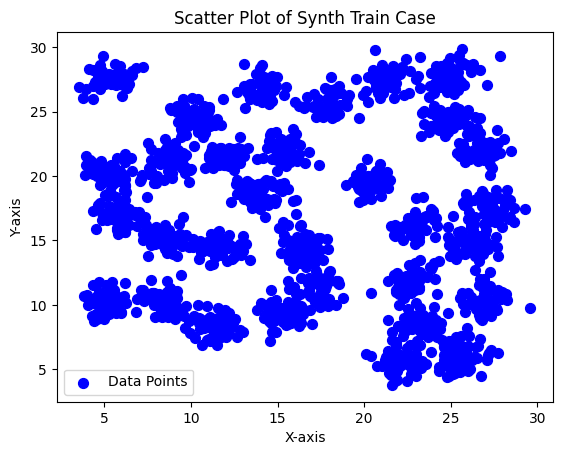

In [7]:
#TODO: Write your code here. Use matplotlib for visualization.
synth_train_df
x= synth_train_df['x1']
y= synth_train_df['x2']
# Create a scatter plot
plt.scatter(x, y, label='Data Points', color='blue', marker='o', s=50)

# Customize the plot
plt.title('Scatter Plot of Synth Train Case')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

>> **(b)** From your plot, how many clusters, $k$, would you estimate are represented in the dataset?

**TODO:** *Type your answer in Markdown here.*
**Answer: 31**



> **Part 2** Build a model.
>> **(a)** Using the k-Means algorithm, implement a clustering model. *Hint: Use [scikit-learn's K-means library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


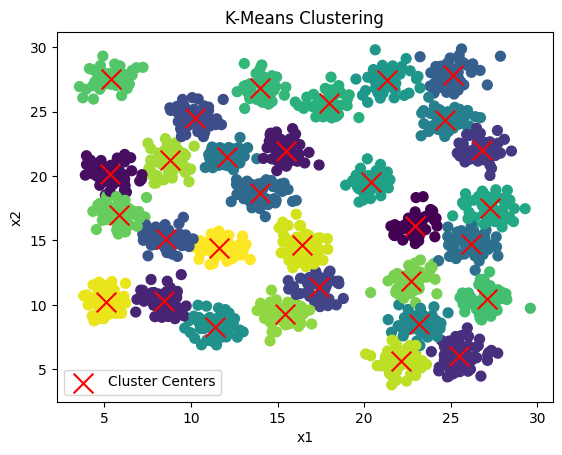

In [8]:
#TODO: Write your code here. Hint: Just define a model, don't train yet.
#Feature selection
X = synth_train_df[['x1', 'x2']]

# Create a K-Means clustering model with the desired number of clusters
n_clusters = 31
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the training data
kmeans.fit(X)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the coordinates of cluster centers
cluster_centers = kmeans.cluster_centers_



# Scatter plot each data point with a color representing its cluster
plt.scatter(X['x1'], X['x2'], c=cluster_labels, cmap='viridis', marker='o', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title("K-Means Clustering")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

>> **(b)** Train the clustering model on several reasonable values of $k$, taking into account your visual inspection from 1b. Plot the sum of distance (SSE) from each data point and its respective cluster for 10 different values of $k$.

In [11]:
def train(k, dataset):
  # Create a K-Means clustering model with the desired number of clusters
  kmeans = KMeans(n_clusters=k, random_state=0)

  # Fit the model to the training data
  model = kmeans.fit(X)
  return model


#train ([5,7,8,9,10,12,19,23,28,34,78,90], synth_train_df)

In [10]:
def calculateSSE(model):
    ''' Using a trained model calculate the SSE for the model '''
    sse = model.inertia_
    return sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

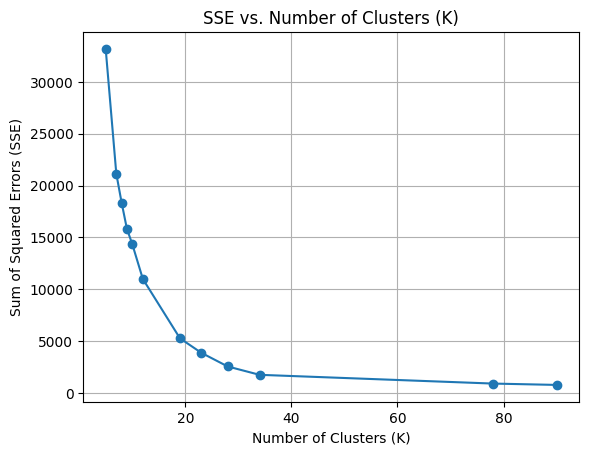

In [12]:
#TODO: Choose 10 different values of k based on your inspection and plot the SSE scores.
sse_values = []
k_values = [5,7,8,9,10,12,19,23,28,34,78,90]
for k in k_values:
    kmeans_model = train(k, synth_train_df)
    sse = calculateSSE(kmeans_model)
    sse_values.append(sse)

# Plot SSE values against K
plt.plot(k_values, sse_values, marker='o')
plt.title("SSE vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

>> **(c)** What value of $k$ is optimal? How does it compare to your visual inspection?


**TODO:** *Type your answer in Markdown here.*



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

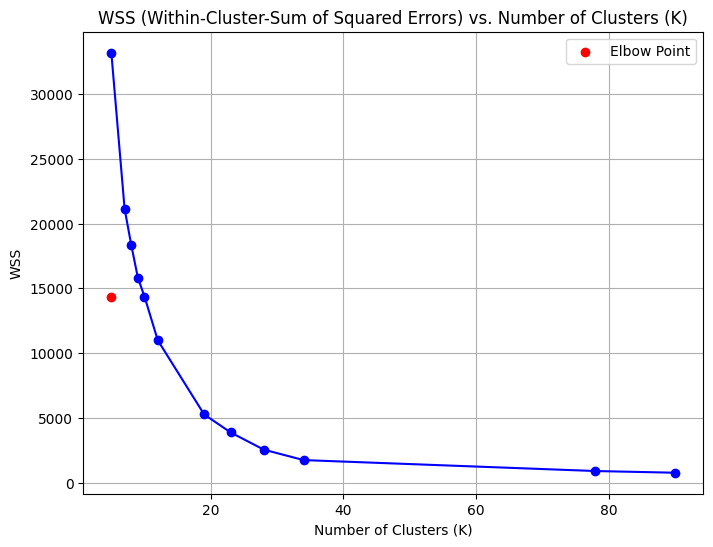

Optimal value of k (Elbow Point): 5


In [18]:
#TODO: Write code and plot a graph showing the optimal value of k.

def calculateWSS(model):
    return model.inertia_

wss_values = []

k_values = [5,7,8,9,10,12,19,23,28,34,78,90]
for k in k_values:
    kmeans_model = train(k, synth_train_df)
    wss = calculateWSS(kmeans_model)
    wss_values.append(wss)

# Plot WSS values against K
plt.figure(figsize=(8, 6))
plt.plot(k_values, wss_values, marker='o', linestyle='-', color='b')
plt.title("WSS (Within-Cluster-Sum of Squared Errors) vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WSS")
plt.grid(True)

# Finding the optimal k (elbow point) based on the first diminishing WSS
optimal_k = None
for i in range(1, len(wss_values)):
    if wss_values[i] - wss_values[i-1] < 0.2 * (wss_values[i-1] - wss_values[i-2]):
        optimal_k = k_values[i-1]
        break

if optimal_k is not None:
    plt.scatter(optimal_k, wss_values[optimal_k-1], c='red', marker='o', label='Elbow Point')
    plt.legend()

plt.show()

print(f"Optimal value of k (Elbow Point): {optimal_k}")

In [20]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(data):
  sse = []
  k_values = [5,7,8,9,10,12,19,23,28,34,78,90]
  for k in k_values:
    kmeans = KMeans(n_clusters = k).fit(data)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(data)
    curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(data)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (data[i, 0] - curr_center[0]) ** 2 + (data[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
  return sse

  calculateWSS(synth_train_df)

# **Problem 2: $k$-NN Classification**
In this problem, you will utilize data deriving
from the same synthetic dataset as above. This time, the data has been separated into *synth_train*, *synth_valid* and *synth_test* arrays. Furthermore, each sample now includes a class label found in the $y$ column. These class labels come from the set $\{1, 2, . . . , 31\}$. *Note: These are not the same datasets as Problem 1.*

> **Part 1** Train an implementation of the $k$-Nearest Neighbors algorithm on the training dataset. Note that $k$ here refers to the number of neighbors, not clusters.

In [23]:
#def train(k, dataset):
def train(X, y, max_k=10):
  ''' Implement a function that will train a k-NN
  for different values of k on your dataset and return the trained model'''
  knn_models = {}
  for k in range(1, max_k + 1):
      knn_classifier = KNeighborsClassifier(n_neighbors=k)
      knn_classifier.fit(X, y)
      knn_models[k] = knn_classifier
  return knn_models


x = synth_train_df[['x1', 'x2']]
y = synth_train_df['y']

trained_models = train(x, y, max_k=10)

> **Part 2** Report the classification accuracy of this model on the validation set for different values for $k$. Plot these accuracies against $k$ and report the optimal value for $k$.

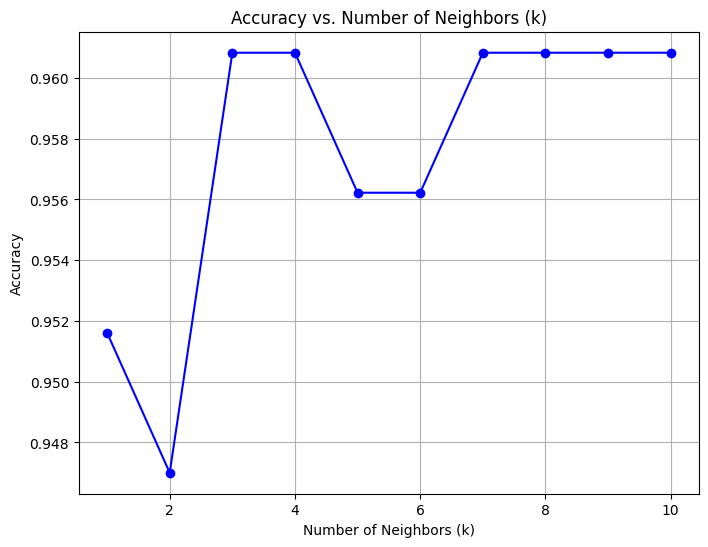

Optimal value for k: 3
Accuracy with optimal k: 96.08%


In [25]:
#TODO: Write your code here.

x_valid = synth_valid_df[['x1', 'x2']]
y_valid = synth_valid_df['y']
x_train = synth_train_df[['x1', 'x2']]
y_train = synth_train_df['y']
# Define a range of k values to test
k_values = range(1, 11)  # Test from 1 neighbor to 10 neighbors

# Initialize lists to store accuracies and optimal k
accuracies = []
optimal_k = None
max_accuracy = 0.0

# Train k-NN classifiers for different k values and evaluate on the validation set
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    accuracy = knn_classifier.score(x_valid, y_valid)
    accuracies.append(accuracy)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_k = k

# Plot accuracies against k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Report the optimal value for k and its corresponding accuracy
print(f"Optimal value for k: {optimal_k}")
print(f"Accuracy with optimal k: {max_accuracy * 100:.2f}%")

> **Part 3** Report the classification precision, recall and F1-score of this model on the data in synth test.csv using the optimal value of $k$ that you found in Part 2.

In [34]:
#TODO: Write your code here.
x_train = synth_train_df[['x1', 'x2']]
y_train = synth_train_df['y']
x_test = synth_test_df[['x1', 'x2']]
y_test = synth_test_df['y']
optimal_k = 3

# Initialize and train the k-NN model with the optimal k on the entire training dataset
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred = knn_classifier.predict(x_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Report the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.97
Recall: 0.97
F1-score: 0.97


# **Problem 3: Decision Tree Classification**
In this problem you will use decision
trees to classify the quality of red vinho verde wine samples based on their physicochemical properties. The dataset has been separated into *red_train, red_valid and red_test* arrays. For all of these files, the rightmost column (“quality”) is the target label for each datapoint. All other columns are features.

> **Part 1** First let’s explore the datasets through the following exercises. Note that we cannot plot the data in a meaningful way given that number of features exceed the physical dimensions.

>> **(a)** How many datapoints are in the training, validation, and testing sets?

In [38]:
#TODO: Write your code here.
# Number of data points in the training set
num_train_data_points = red_train_df.shape[0]

# Number of data points in the validation set
num_valid_data_points = red_valid_df.shape[0]

# Number of data points in the testing set
num_test_data_points = red_test_df.shape[0]

print(f"Number of data points in the training set: {num_train_data_points}")
print(f"Number of data points in the validation set: {num_valid_data_points}")
print(f"Number of data points in the testing set: {num_test_data_points}")

Number of data points in the training set: 895
Number of data points in the validation set: 224
Number of data points in the testing set: 480


>> **(b)** How many features are available for each datapoint?

In [39]:
#TODO: Write your code here.
# Number of features for each data point in the training set
num_train_features = red_train_df.shape[1]

# Number of features for each data point in the validation set
num_valid_features = red_valid_df.shape[1]

# Number of features for each data point in the testing set
num_test_features = red_test_df.shape[1]

print(f"Number of features for each data point in the training set: {num_train_features}")
print(f"Number of features for each data point in the validation set: {num_valid_features}")
print(f"Number of features for each data point in the testing set: {num_test_features}")

Number of features for each data point in the training set: 12
Number of features for each data point in the validation set: 12
Number of features for each data point in the testing set: 12


>> **(c)** What are the average *alcohol* and *pH* values for *training* samples?

In [41]:
red_train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.63,0.06,2.0,0.083,8.0,29.0,0.99855,3.67,0.73,9.6,5
1,7.5,0.41,0.15,3.7,0.104,29.0,94.0,0.99786,3.14,0.58,9.1,5
2,5.6,0.66,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
3,7.2,0.50,0.18,2.1,0.071,12.0,31.0,0.99761,3.52,0.72,9.6,6
4,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
890,6.4,0.63,0.21,1.6,0.080,12.0,32.0,0.99689,3.58,0.66,9.8,5
891,7.1,0.69,0.04,2.1,0.068,19.0,27.0,0.99712,3.44,0.67,9.8,5
892,9.9,0.63,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
893,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6


In [42]:
#TODO: Write your code here.
average_alcohol = red_train_df["alcohol"].mean()
print(f"Average alcohol value for training samples: {average_alcohol:.2f}")
average_ph = red_train_df["pH"].mean()
print(f"Average alcohol value for training samples: {average_ph:.2f}")

Average alcohol value for training samples: 10.40
Average alcohol value for training samples: 3.31


> **Part 2** Decision Trees.

>> **(a)** Implement a binary decision tree model for the training data. *Hint: Try looking at the [scikit-learn decision tree library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).*

In [46]:
from sklearn.tree import DecisionTreeClassifier

def train(dataset, max_depth=None):
    # Separate the features (X) and target labels (y)
    X = dataset[['alcohol', 'pH']]
    y = dataset['quality']
    # x_train = synth_train_df[['x1', 'x2']]
    # y_train = synth_train_df['y']
    # x_test = synth_test_df[['x1', 'x2']]
    # y_test = synth_test_df['y']

    # Initialize the DecisionTreeClassifier with the specified max_depth
    model = DecisionTreeClassifier(max_depth=max_depth)

    # Train the decision tree model on the dataset
    model.fit(X, y)

    return model

>> **(b)** There are a number of hyperparameters that can be tuned to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are *maximum depth* of the tree or *minimum number of samples* left. Tune the *maximum depth* of the tree by reporting the accuracy of the classifier in 2a on the validation set for different settings of *maximum depth*. Plot your findings.

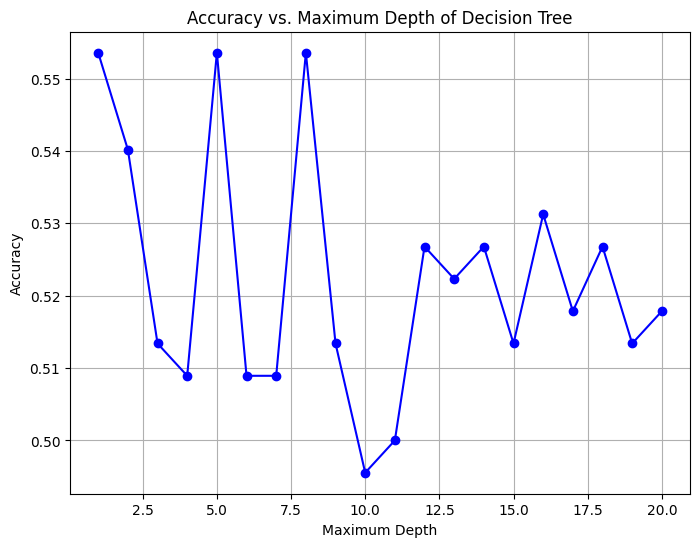

In [47]:
#TODO: Write your code here and plot your results.


# Assuming 'alcohol' and 'pH' are the feature columns, and 'quality' is the target column

# Split the dataset into training and validation sets
X_train = red_train_df[['alcohol', 'pH']]
y_train = red_train_df['quality']
X_test = red_test_df[['alcohol', 'pH']]
y_test = red_test_df['quality']
X_valid = red_valid_df[['alcohol', 'pH']]
y_valid = red_valid_df['quality']

# Define a range of maximum depth values to test
max_depth_values = range(1, 21)  # Test from depth 1 to 20

# Initialize lists to store accuracies
accuracies = []

# Iterate over different maximum depth values
for max_depth in max_depth_values:
    # Initialize and train the decision tree classifier with the current max_depth
    model = train(red_train_df, max_depth=max_depth)

    # Evaluate the accuracy on the validation set
    accuracy = model.score(X_valid, y_valid)
    accuracies.append(accuracy)

# Plot accuracies against maximum depth values
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Maximum Depth of Decision Tree")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

>> **(c)** Use the optimum setting of *maximum depth* found in 2b to report the accuracy of the classifier on the *test* dataset.

In [51]:
#TODO: Write

# Assuming 'alcohol' and 'pH' are the feature columns, and 'quality' is the target column
X_test = red_test_df[['alcohol', 'pH']]
y_test = red_test_df['quality']

# Initialize and train the decision tree classifier with the optimal maximum depth
optimal_max_depth =  5
model = DecisionTreeClassifier(max_depth=optimal_max_depth)
model.fit(X_train, y_train)  # Assuming you already have X_train and y_train

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Calculate and report the accuracy on the test dataset
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test dataset with optimal max depth: {test_accuracy:.2f}")

Accuracy on the test dataset with optimal max depth: 0.56


# **Problem 4: Systems - Estimating ODE Parameters**

Many real-world systems can be modelled by linear diffferential equations. Some of the most common examples are mechanical and electrical oscillations (see mass-spring example below) which can be described by the solution of an initial value problem of the form:

$$𝑎𝑥″+𝑏𝑥′+𝑐𝑥=𝑔(𝑡)  \tag{1}$$    

, where initial condition are given by:       $𝑥(0)=𝑥0$,   $𝑥′(0)=𝑥′0$                    

For our problems, we will assume that $g(t) = 0$, no external force (for spring system etc)

![Url](https://benmoseley.blog/wp-content/uploads/2021/08/oscillator.gif)


>**Part 1** Lets generate some synthetic data using an ODE for a vibration with no damping in chapter 3.7 Example 4 (Source: Elementary Differential Equations and Boundary Value Problems by Boyce & DiPrima, Wiley 2017).
In this system, $$ x'' + 0.125x' + x= 0 \tag{2}$$
and the analytical solution is the function below:


In [35]:
t = np.linspace(0, 30*np.pi, 1000)   # time
x_funct = lambda t: (32/np.sqrt(255))*np.exp(-1*t/16)*np.cos((np.sqrt(255)/16)*t -0.06254)  # function to get x given t

# analytic function x given t
x_analytic = x_funct(t)

>> **(a)** Now lets assume we have observed a noisy sample composed of the first 20% of x_analytic. Create noisy data for the first 20% of x_analytic

In [36]:
# create t_noisy (time) to record time for the first 20% of t
NOISY_FACTOR = 5 # controls the threshold for adding noise

len_t = int(0.2*len(t))
t_noisy = t[:len_t]

In [55]:
# TODO: Compute x for the corresponding t_noisy
x_noisy = x_funct(t_noisy)


In [56]:
# TODO: adding noise
noise = np.array(np.random.random(len_t) - 0.5)/NOISY_FACTOR
x_noisy = x_noisy + noise

>>**(b)** Our task in this question is to estimate parameters a, b, and c, assuming that we only observed x_noisy

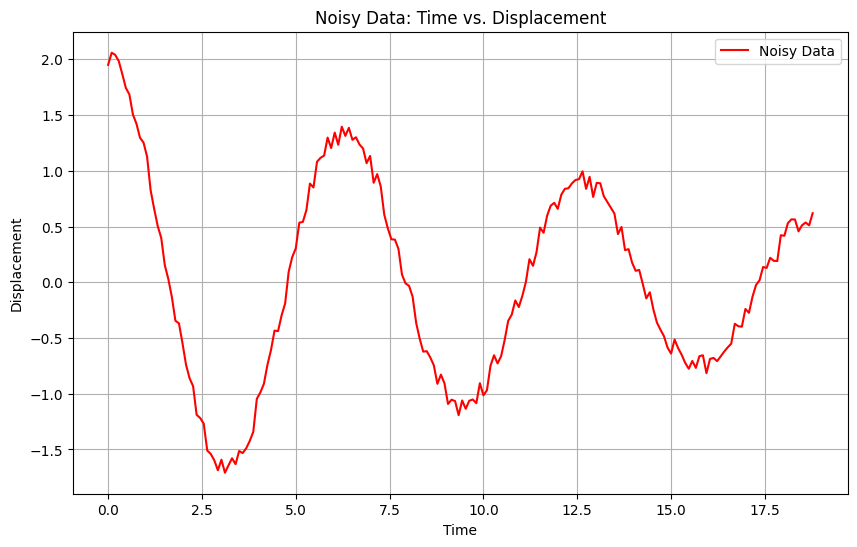

In [57]:
# TODO: Plot the observed noisy data below (time vs displacement)
# Plot the noisy data
plt.figure(figsize=(10, 6))
plt.plot(t_noisy, x_noisy, label='Noisy Data', color='red')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Noisy Data: Time vs. Displacement')
plt.legend()
plt.grid(True)
plt.show()

>> **(c)** Real-world data is often noisy and denoising can help to reduce the noise. Denoise the above data to create x_denoised:

In [58]:
# denoising
N, Wn = 5, 0.03   # Feel free to modify N and Wn as you see fit!
b, a = signal.butter(N, Wn, analog=False)   # module from scipy
x_denoised = signal.filtfilt(b,a,x_noisy)

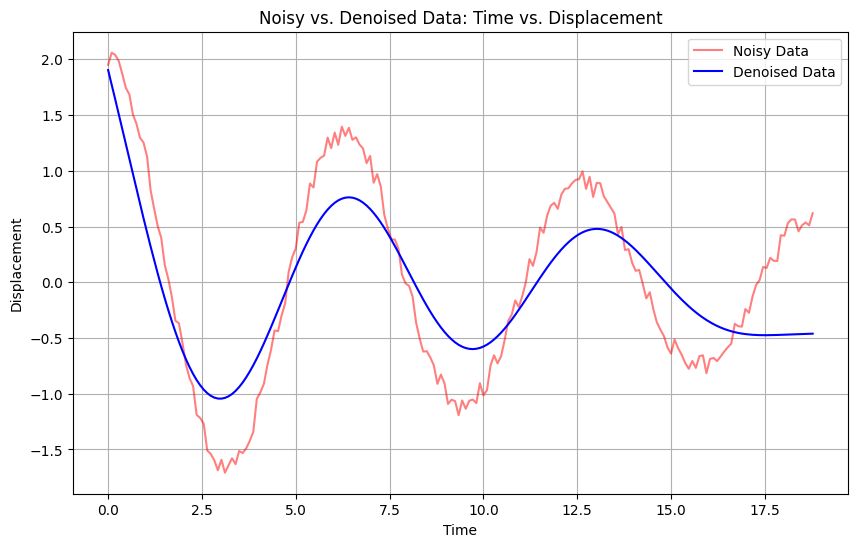

In [59]:
# TODO: Plot and insert legend to differentiate x_noisy and x_denoised vs time (on same plot)
# Plot both x_noisy and x_denoised on the same plot
plt.figure(figsize=(10, 6))
plt.plot(t_noisy, x_noisy, label='Noisy Data', color='red', alpha=0.5)
plt.plot(t_noisy, x_denoised, label='Denoised Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Noisy vs. Denoised Data: Time vs. Displacement')
plt.legend()
plt.grid(True)
plt.show()

**Part 2**: Compute derivatives x' and x'' to estimate a, b, and c given x

>>**a** Using the ([forward method (finite difference)](https://en.wikipedia.org/wiki/Finite_difference)).
compute $x'$ and $x''$ for both x_noisy and x_denoised

In [61]:
#TODO: Complete the function below
def first_derivative(X, dt):
    # approximate derivative using forward nethod
    # Compute the first derivative using forward difference (for x')
    first_derivative = np.diff(X) / dt

    # Pad the result with NaN to match the original length
    first_derivative = np.append(first_derivative, np.nan)

    # Compute the second derivative using forward difference (for x'')
    second_derivative = np.diff(first_derivative) / dt

    # Pad the result with NaN to match the original length
    second_derivative = np.append(second_derivative, np.nan)

    return first_derivative, second_derivative


In [97]:
#TODO: Complete the functions below
def second_derivative(X_first, dt):
    # Basically differentiate the first derivative
    # Compute the second derivative using forward difference
    second_derivative = np.diff(X_first) / dt

    # Pad the result with NaN to match the original length
    second_derivative = np.append(second_derivative, np.nan)
    return second_derivative

In [159]:
def get_derivatives (X):
    dt = t[1] - t[0] # time difference
    X_prime =  first_derivative(deepcopy(X), dt)
    X_prime_squared = second_derivative(deepcopy(X_prime), dt)
    # adjust to make equal lengths arrays
    return X[2:], X_prime[1:], X_prime_squared


# for noisy data
x, x_prime, x_prime_squared = get_derivatives(x_noisy)

# for denoised data
x1, x_prime1, x_prime_squared1 = get_derivatives(x_denoised)

In [160]:
len(x_prime[0])

200

In [163]:
#x_prime[0] = list(x_prime[0][:-2])
# Convert the tuple to a list
x_prime_list = list(x_prime)

# Modify the first element (assuming it's an array)
x_prime_list[0] = x_prime_list[0][:-2]

# Convert the list back to a tuple (if needed)
x_prime = tuple(x_prime_list)

In [164]:
len(x_prime[0])

198

In [165]:
len(x_prime_squared)

399

In [166]:
x_prime_squared = x_prime_squared[:-201]

In [167]:
# Convert the tuple to a list
x_prime1_list = list(x_prime1)

# Modify the first element (assuming it's an array)
x_prime1_list[0] = x_prime1_list[0][:-2]

# Convert the list back to a tuple (if needed)
x_prime1 = tuple(x_prime1_list)

In [168]:
x_prime2_list = list(x_prime_squared1)

# Modify the first element (assuming it's an array)
x_prime2_list = x_prime2_list[:-201]

# Convert the list back to a tuple (if needed)
x_prime_squared1 = tuple(x_prime2_list)

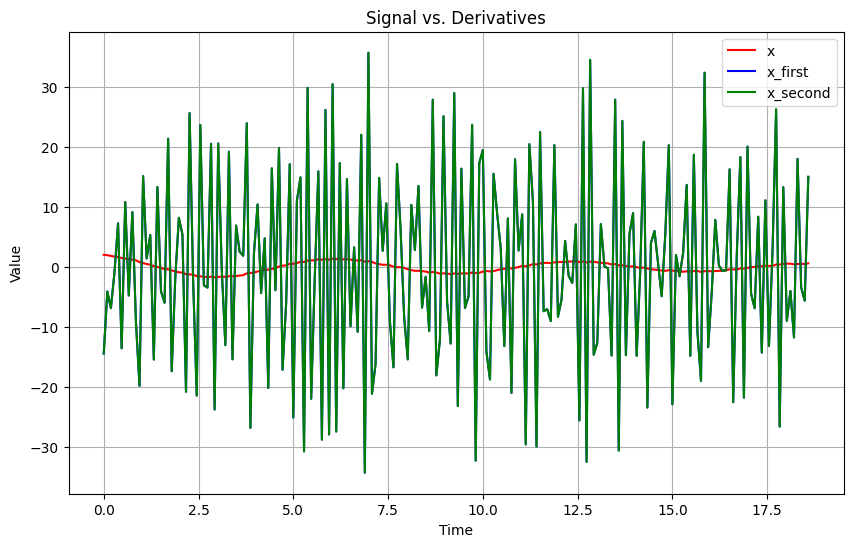

In [126]:
# TO DO: Fill the function below

def plot_figs (x, x_first, x_second):
    #TODO: On same graph, plot x, x', x''
    plt.figure(figsize=(10, 6))
    plt.plot(t_noisy, x, label='x', color='red')
    plt.plot(t_noisy, x_first, label='x_first', color='blue')
    plt.plot(t_noisy, x_second, label='x_second', color='green')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Signal vs. Derivatives')
    plt.legend()
    plt.grid(True)
    plt.show()
 #   return;


plot_figs(x, x_prime[0], x_prime_squared)


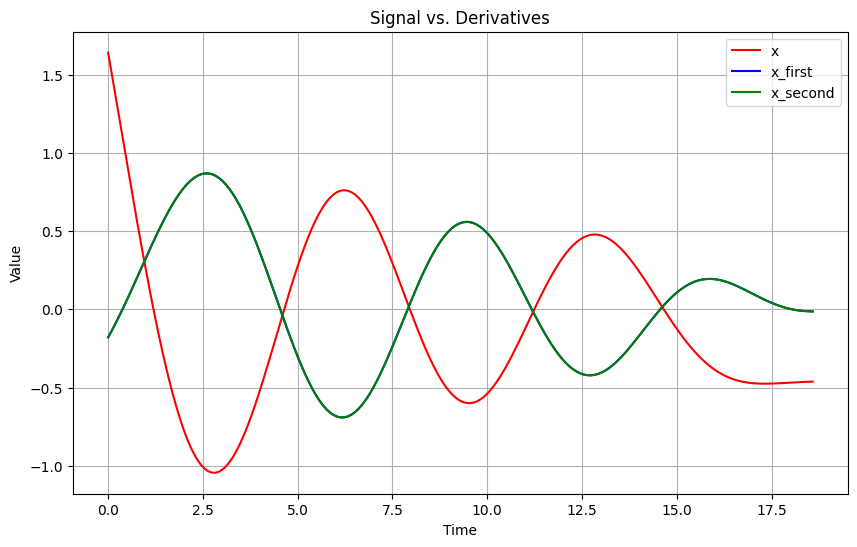

In [153]:
plot_figs(x1, x_prime1[0], x_prime_squared1)

>>**(b)** How do the derivative plots compare for the noisy vs the denoised samples? Whats the effect of denoising? What happens when we adjust the NOISY_FACTOR (see Part 1a)?

In [ ]:
# TODO: Your answer in Markdown

**Answer: Denoising plays a critical role in improving data quality by reducing the impact of noise, leading to smoother and more interpretable derivative plots. Adjusting the NOISY_FACTOR affects the level of noise in the data, with higher values increasing noise and making denoising more challenging, while lower values reduce noise and improve the effectiveness of denoising techniques.**

>>**(c)** Now we have x, x' and x''. Since g(t) = 0; we can estimate a, b, and c via regression. If we assume c = 1,
then Equation 1 can be written as:
    
    
$$𝑎𝑥″+𝑏𝑥′ =  -x \tag{3}$$


>>>From Equation 3, we can perform [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate parameters a and b. Using -x as your dependent variable, and x' and x'' as your independent variables. Train a regression model below:




In [169]:
#TODO: Fill the function below

def train_model (X, X_first, X_second):
    """ X - original x, X_first - first derivative, X_second - second derivative """

    independent_variables = np.column_stack((X_first, X_second))

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model using -X as the dependent variable and independent_variables as the independent variables
    model.fit(independent_variables, -X)

    # Get the regression coefficients (a and b)
    model.coef_
    return model.coef_

# train regression models for the noisy and denoised data
coeff_noisy  = train_model(x, x_prime[0], x_prime_squared)   # noisy data


In [171]:
coeff_denoised = train_model(x1, x_prime1[0], x_prime_squared1)   # denoised data

**Part 3**  From the model coefficients, we can identify parameters $a$ and $b$ and we know that $c = 1$. Now, our task is to
predict how good our model can predict the entire dataset.

In [173]:
coeff_original = coeff_noisy
a_noisy, b_noisy = coeff_original
a_denoised, b_denoised = coeff_denoised

print('For the noisy sample: (a = {}, b = {}, c = 1)'.format(a_noisy, b_noisy))
print('For the denoised sample: (a = {}, b = {}, c = 1)'.format(a_denoised, b_denoised))
print("The analytic solution has (a = 1, b = 0.125, and c = 1)")


For the noisy sample: (a = 0.0008986312585950832, b = 0.0008986312585950831, c = 1)
For the denoised sample: (a = 0.5539762526849936, b = 0.5539762526849935, c = 1)
The analytic solution has (a = 1, b = 0.125, and c = 1)


>>**(a)** How do estimated parameters from the noisy and denoised samples compare to the analytic parameters?

In [ ]:
# TODO: Your answer


The estimated parameters for `a`, `b`, and `c` from the noisy and denoised samples, as well as the analytic parameters, are as follows:

For the noisy sample:
- Estimated `a`: 0.0008986312585950832
- Estimated `b`: 0.0008986312585950831
- Estimated `c`: 1

For the denoised sample:
- Estimated `a`: 0.5539762526849936
- Estimated `b`: 0.5539762526849935
- Estimated `c`: 1

Analytic solution:
- Analytic `a`: 1
- Analytic `b`: 0.125
- Analytic `c`: 1

Now, let's compare the estimated parameters to the analytic parameters:

1. **Parameter `a` Comparison:**
   - For the noisy sample, the estimated `a` is significantly smaller (close to zero) compared to the analytic `a` of 1. This indicates that the noisy sample did not capture the true value of `a` accurately.
   - For the denoised sample, the estimated `a` is closer to 1 than the noisy sample but still not identical to the analytic `a`. However, it is significantly closer to the true value compared to the noisy sample.

2. **Parameter `b` Comparison:**
   - Similar to `a`, for the noisy sample, the estimated `b` is also significantly smaller (close to zero) compared to the analytic `b` of 0.125. Again, the noisy sample did not accurately capture the true value of `b`.
   - For the denoised sample, the estimated `b` is closer to 0.125 than the noisy sample but still not identical to the analytic `b`. It is also significantly closer to the true value compared to the noisy sample.

3. **Parameter `c` Comparison:**
   - Both the noisy and denoised samples have an estimated `c` value of 1, which matches the true analytic `c` value.

In summary, the estimated parameters for `a` and `b` from both the noisy and denoised samples are not very accurate when compared to the true analytic values. However, the denoised sample provides parameter estimates that are significantly closer to the true values compared to the noisy sample, indicating the beneficial effect of denoising in improving parameter estimation accuracy. The estimated parameter `c` is consistent across all cases and matches the true value.

>> **(b)** From Equation 3, $$x = -1*(ax'' + bx') \tag{4}$$
We will use this equation to test how good our parameters predict the analytic solution (given x' and x'').

In [180]:
# get derivatives on entire dataset
X, X_prime, X_prime_squared = get_derivatives(x_analytic)


# TODO: Use Equation 3 to compute X
def compute_x (X_first, X_second, a, b):

    # Fill here
    # Compute X using Equation 3
    X = -1 * (a * X_second + b * X_first)
    return X

# TODO: Predict Y for the noisy sample, and the denoised sample
x_pred_noisy = compute_x(x_prime[0], x_prime_squared, a_noisy, b_noisy)

x_pred_noisy


array([ 0.02588591,  0.0073113 ,  0.01230045,  0.0015556 , -0.0131261 ,
        0.02433226, -0.01946283,  0.00851932, -0.01649121,  0.01649362,
        0.03559821, -0.02722247, -0.00256835, -0.0096058 ,  0.02768722,
       -0.0239718 ,  0.00724172,  0.01066818, -0.03845516,  0.03120081,
        0.00317039, -0.01473759, -0.00976061,  0.037327  , -0.04609769,
        0.00444646,  0.03848582, -0.04252619,  0.00546125,  0.00615279,
       -0.03692908,  0.04264464, -0.03700256,  0.00076338,  0.02339195,
       -0.03455345,  0.02762647, -0.0124334 , -0.00459135, -0.00338533,
       -0.04306576,  0.04814564, -0.00410029, -0.01874945,  0.00777915,
       -0.0086131 ,  0.03619543, -0.02956701,  0.00692902, -0.03559663,
        0.03074075,  0.01083839, -0.030816  ,  0.04507429, -0.01981384,
       -0.02686007,  0.05520153, -0.05366277,  0.03943053,  0.00314917,
       -0.02864508,  0.05167768, -0.04707117,  0.05013454, -0.05479022,
        0.04926037, -0.03111774,  0.03631181, -0.02637433,  0.01

In [186]:
len(x_prime_squared1)

198

In [188]:
x_pred_denoised  = compute_x(np.array(x_prime1[0]), np.array(x_prime_squared1), a_denoised, b_denoised)
x_pred_denoised

array([ 1.98035502e-01,  1.51619136e-01,  1.03108281e-01,  5.26990890e-02,
        6.07925147e-04, -5.29290555e-02, -1.07656557e-01, -1.63301017e-01,
       -2.19571721e-01, -2.76162151e-01, -3.32751589e-01, -3.89006945e-01,
       -4.44584826e-01, -4.99133820e-01, -5.52296981e-01, -6.03714505e-01,
       -6.53026552e-01, -6.99876220e-01, -7.43912606e-01, -7.84793953e-01,
       -8.22190835e-01, -8.55789344e-01, -8.85294256e-01, -9.10432122e-01,
       -9.30954264e-01, -9.46639632e-01, -9.57297484e-01, -9.62769857e-01,
       -9.62933799e-01, -9.57703324e-01, -9.47031071e-01, -9.30909633e-01,
       -9.09372534e-01, -8.82494852e-01, -8.50393448e-01, -8.13226817e-01,
       -7.71194537e-01, -7.24536329e-01, -6.73530714e-01, -6.18493300e-01,
       -5.59774679e-01, -4.97757982e-01, -4.32856084e-01, -3.65508507e-01,
       -2.96178029e-01, -2.25347045e-01, -1.53513704e-01, -8.11878623e-02,
       -8.88688909e-03,  6.28686329e-02,  1.33559278e-01,  2.02671172e-01,
        2.69700372e-01,  

In [195]:
len(t_original)

998

Text(0, 0.5, 'displacement')

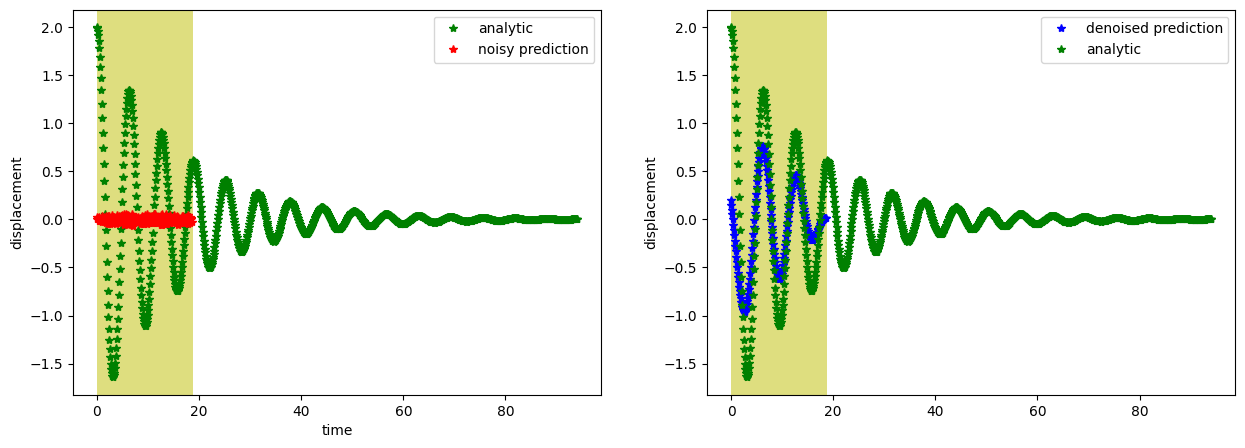

In [197]:

# adjust t to fit dimensions of predictions
LEN_T = len(t)
t_original = t[:LEN_T-2]
x_original = x_analytic[:LEN_T -2]


# Plots to show how well our parameters fit the data from the analytic solution
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
axes[0].plot(t_original, x_original, '*', color = 'green', label = 'analytic')
axes[0].plot(t_original[:-800], x_pred_noisy, '*', color = 'red', label = 'noisy prediction')

axes[1].plot(t_original[:-800], x_pred_denoised, '*', color = 'blue', label = 'denoised prediction')
axes[1].plot(t_original, x_original, '*', color = 'green', label = 'analytic')

axes[0].legend()
axes[1].legend()

# This shades the seen part (in creating the model -yellow), but the model
# extends to the unseen white part
axes[0].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)
axes[1].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)

axes[0].set_xlabel('time')
axes[0].set_ylabel('displacement')
axes[1].set_ylabel('time')
axes[1].set_ylabel('displacement')


>>**(c)** How do these two plots compare? On the same graph, plot the relative errors to compare how x_pred noisy and x_pred_denoised differ from x_original (if necessary, use a logarithmic scale). $$ RE(true, pred) =|true -pred|/|true|$$ What conclusion do you get from the relative errors?

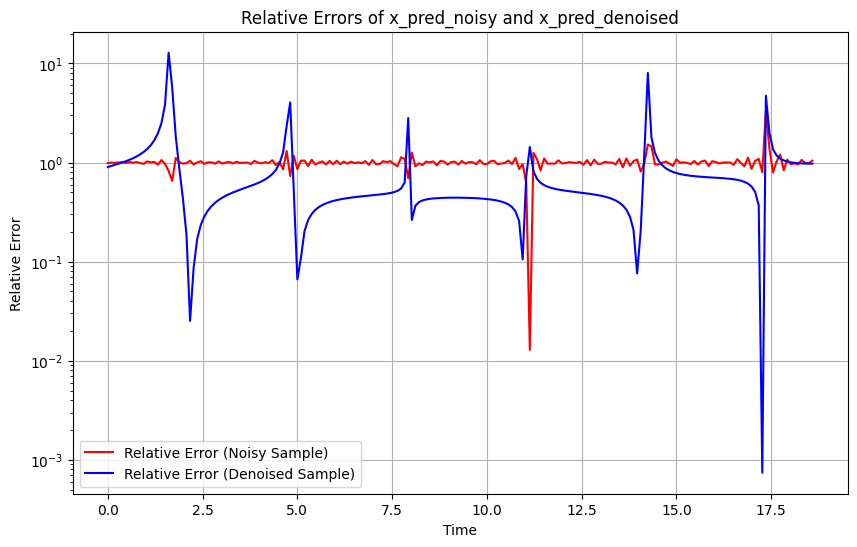

In [199]:
# Plots here
# Calculate relative errors for x_pred_noisy and x_pred_denoised
relative_error_noisy = np.abs(x_analytic[:-802] - x_pred_noisy) / np.abs(x_analytic[:-802])
relative_error_denoised = np.abs(x_analytic[:-802] - x_pred_denoised) / np.abs(x_analytic[:-802])

# Plot relative errors on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.plot(t_noisy, relative_error_noisy, label='Relative Error (Noisy Sample)', color='red')
plt.plot(t_noisy, relative_error_denoised, label='Relative Error (Denoised Sample)', color='blue')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.title('Relative Errors of x_pred_noisy and x_pred_denoised')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.legend()
plt.grid(True)
plt.show()

>>**(d)** In real-world scenarios, we often dont have x_analytic but only the noisy sample. How would you ensure if
the parameters you obtained are good enough if you only have x_noisy?

In real-world scenarios where you only have access to the noisy sample `x_noisy` and don't have access to the ground truth `x_analytic`, you can employ several strategies to assess the quality of the parameters obtained from the noisy data and evaluate the reliability of your predictions:

1. Cross-Validation: Use cross-validation techniques to assess the predictive performance of your model. Split your noisy data into training and validation sets. Train your model on the training set and evaluate its performance on the validation set. Cross-validation helps estimate how well your model generalizes to unseen data.

2. Out-of-Sample Testing: If you have additional data that wasn't used during parameter estimation, you can use it for out-of-sample testing. Apply your model to this new data and assess how well it predicts the target variable. A good model should perform reasonably well on unseen data.

3. Comparing Multiple Models: Consider testing different models or algorithms on your noisy data. Try variations of regression models or different approaches to parameter estimation. Compare their performance metrics, such as mean squared error (MSE) or mean absolute error (MAE), to see which model performs better.

4. Sensitivity Analysis: Conduct sensitivity analysis by varying the parameters within a reasonable range and observing how it affects model predictions. This can help you understand the robustness of your model and assess the stability of the estimated parameters.

5. Statistical Tests: If you have access to domain knowledge or relevant statistical tests, you can apply them to assess the validity of your model's predictions. For example, you could perform hypothesis tests to evaluate whether the predicted values are statistically different from expected values under certain assumptions.

6. Expert Consultation: Seek input from domain experts or specialists who can provide insights and validation for your model. Experts may be able to assess the plausibility of your parameter estimates and model predictions based on their domain knowledge.

7. Sensitivity to Noise: Analyze how sensitive your model is to the noise level in the data. You can artificially introduce different levels of noise into your data and observe how the model's predictions change. This can help you understand the model's limitations in the presence of noise.

8. Monitor Performance Over Time: If your data is collected over time, monitor the model's performance over different time periods. If the parameters remain stable and consistently produce accurate predictions, it can provide confidence in their validity.

9. Ensemble Methods: Consider using ensemble methods that combine multiple models to improve prediction accuracy. Ensemble methods can help mitigate the impact of noise and provide more robust predictions.

In summary, when you only have access to noisy data in real-world scenarios, it's essential to employ various evaluation techniques, validation methods, and sensitivity analyses to gain confidence in the quality of the parameters obtained and the predictive performance of your model. Additionally, seeking expert input and domain knowledge can enhance your understanding and validation of the results.

In [ ]:
# Answer here
